# Book recommendation

## libraries

In [2]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

import seaborn as sns

## get data files

In [4]:
# !wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

# !unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

## import csv data into dataframes

In [5]:
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_books.head()

,isbn,title,author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber


In [6]:
df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

df_ratings.head()

,user,isbn,rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


## My contribution

### Task : 

After importing and cleaning the data, use `NearestNeighbors` from `sklearn.neighbors` to develop a model that shows books that are similar to a given book. The Nearest Neighbors algorithm measures the distance to determine the “closeness” of instances.

Create a function named `get_recommends` that takes a book title (from the dataset) as an argument and returns a list of 5 similar books with their distances from the book argument.

#### This code : 

```python
get_recommends("The Queen of the Damned (Vampire Chronicles (Paperback))")
```

#### Should return :


```bash
[
  'The Queen of the Damned (Vampire Chronicles (Paperback))',
  [
    ['Catch 22', 0.793983519077301], 
    ['The Witching Hour (Lives of the Mayfair Witches)', 0.7448656558990479], 
    ['Interview with the Vampire', 0.7345068454742432],
    ['The Tale of the Body Thief (Vampire Chronicles (Paperback))', 0.5376338362693787],
    ['The Vampire Lestat (Vampire Chronicles, Book II)', 0.5178412199020386]
  ]
]
```

Notice that the data returned from `get_recommends()` is a list. The first element in the list is the book title passed into the function. The second element in the list is a list of five more lists. Each of the five lists contains a recommended book and the distance from the recommended book to the book passed into the function.

If you graph the dataset (optional), you will notice that most books are not rated frequently. To ensure statistical significance, remove from the dataset users with less than 200 ratings and books with less than 100 ratings.

The first three cells import libraries you may need and the data to use. The final cell is for testing. Write all your code in between those cells.

### Application

#### Isolating the best data

Making new data frames named `df_great_users` and `df_great_books`  containing the users that rated more than 200 book and books that been rated more than 100 time 

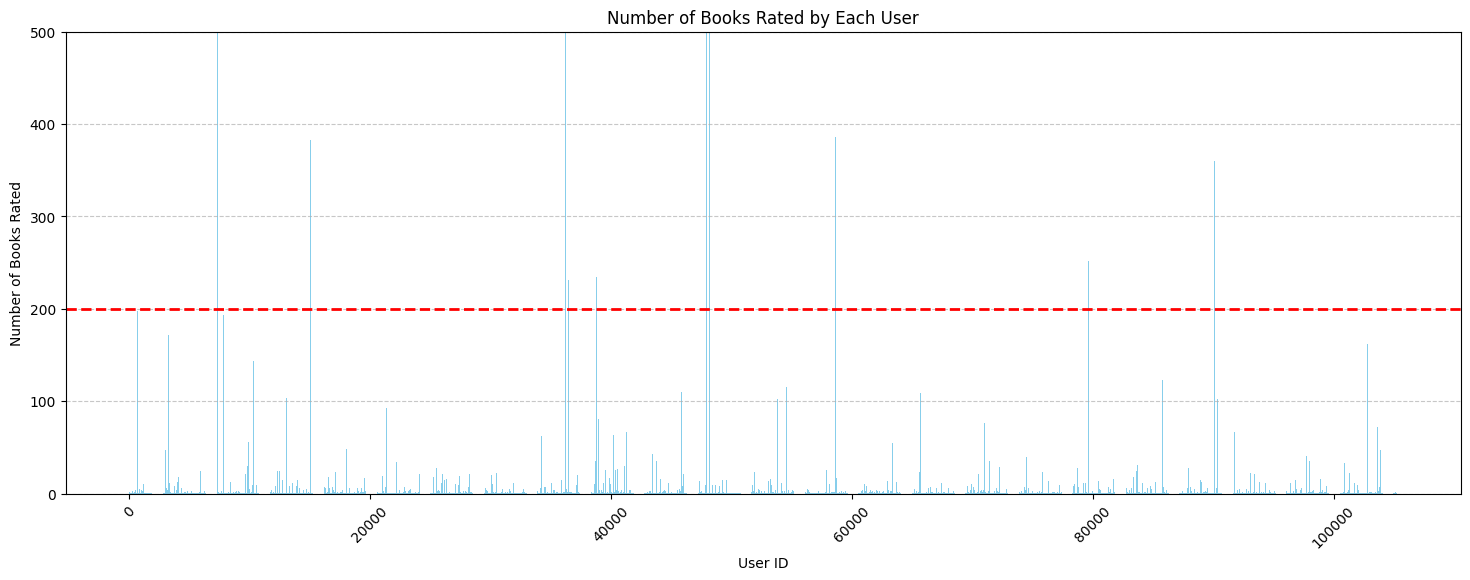

In [ ]:
# Create a dataframe `df_user_ratings` containing users and number of rated books and showing it 
df_user_ratings = df_ratings.groupby('user').size().reset_index(name='nb_rate')

df_user_ratings = df_user_ratings.reset_index(drop=True)
df_user_ratings['did'] = df_user_ratings.index

plt.figure(figsize=(18,6))
plt.bar(df_user_ratings['did'], df_user_ratings['nb_rate'], color='skyblue')
plt.ylim(0, 500)
plt.axhline(y=200, color='red', linestyle='--', linewidth=2)
plt.xlabel('User ID')
plt.ylabel('Number of Books Rated')
plt.title('Number of Books Rated by Each User')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

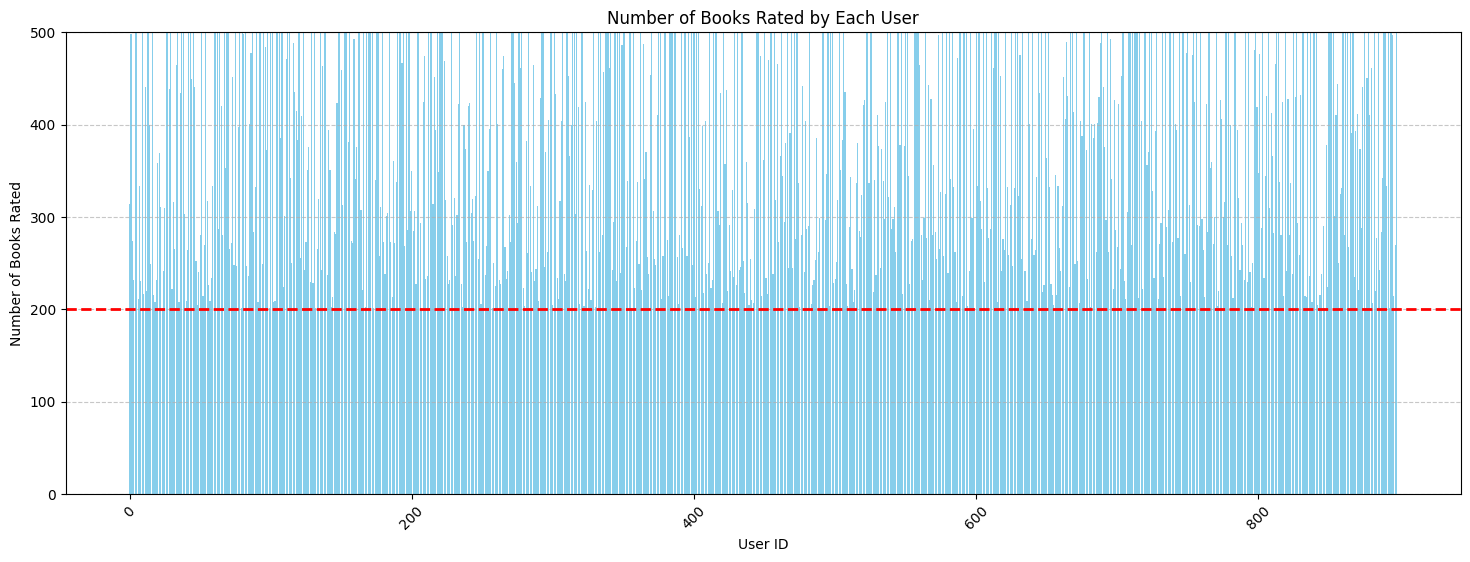

In [45]:
df_great_users = df_user_ratings[df_user_ratings['nb_rate'] > 200]
df_great_users = df_great_users.reset_index(drop=True)
df_great_users['did'] = df_great_users.index

plt.figure(figsize=(18,6))
plt.bar(df_great_users['did'], df_great_users['nb_rate'], color='skyblue')
plt.ylim(0, 500)
plt.axhline(y=200, color='red', linestyle='--', linewidth=2)
plt.xlabel('User ID')
plt.ylabel('Number of Books Rated')
plt.title('Number of Books Rated by Each User')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

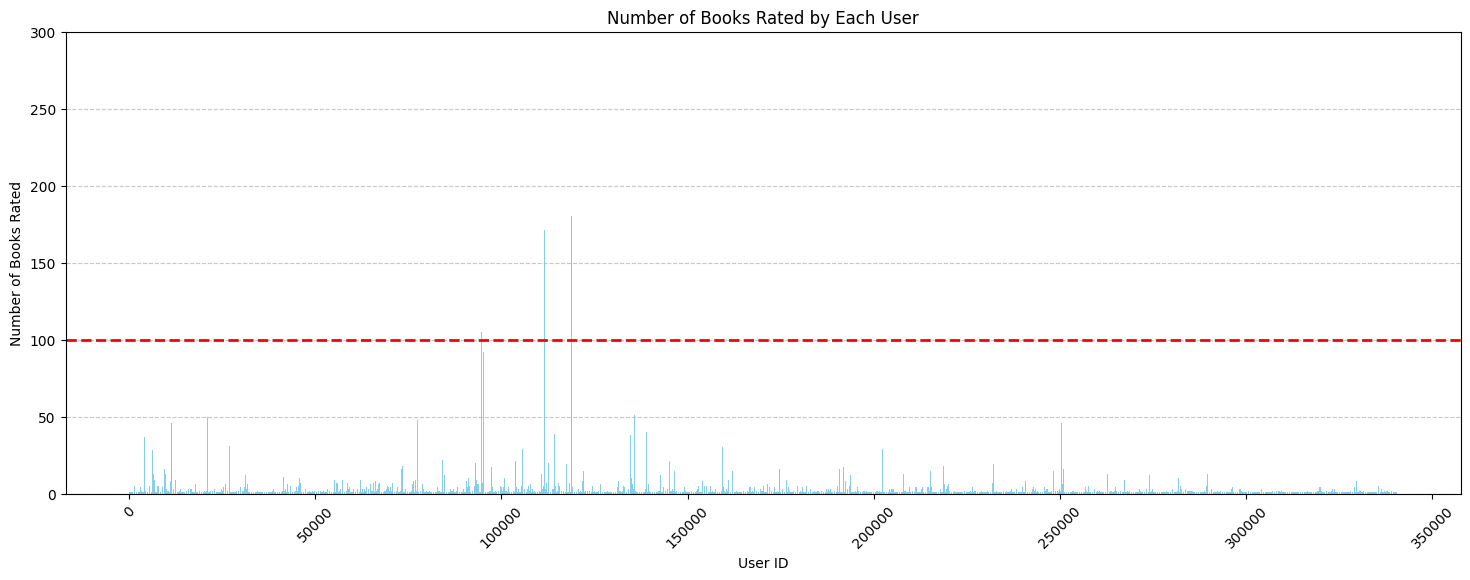

In [47]:
df_book_ratings = df_ratings.groupby('isbn').size().reset_index(name='nb_rate')

df_book_ratings = df_book_ratings.reset_index(drop=True)
df_book_ratings['did'] = df_book_ratings.index

plt.figure(figsize=(18,6))
plt.bar(df_book_ratings['did'], df_book_ratings['nb_rate'], color='skyblue')
plt.ylim(0, 300)
plt.axhline(y=100, color='red', linestyle='--', linewidth=2)
plt.xlabel('User ID')
plt.ylabel('Number of Books Rated')
plt.title('Number of Books Rated by Each User')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

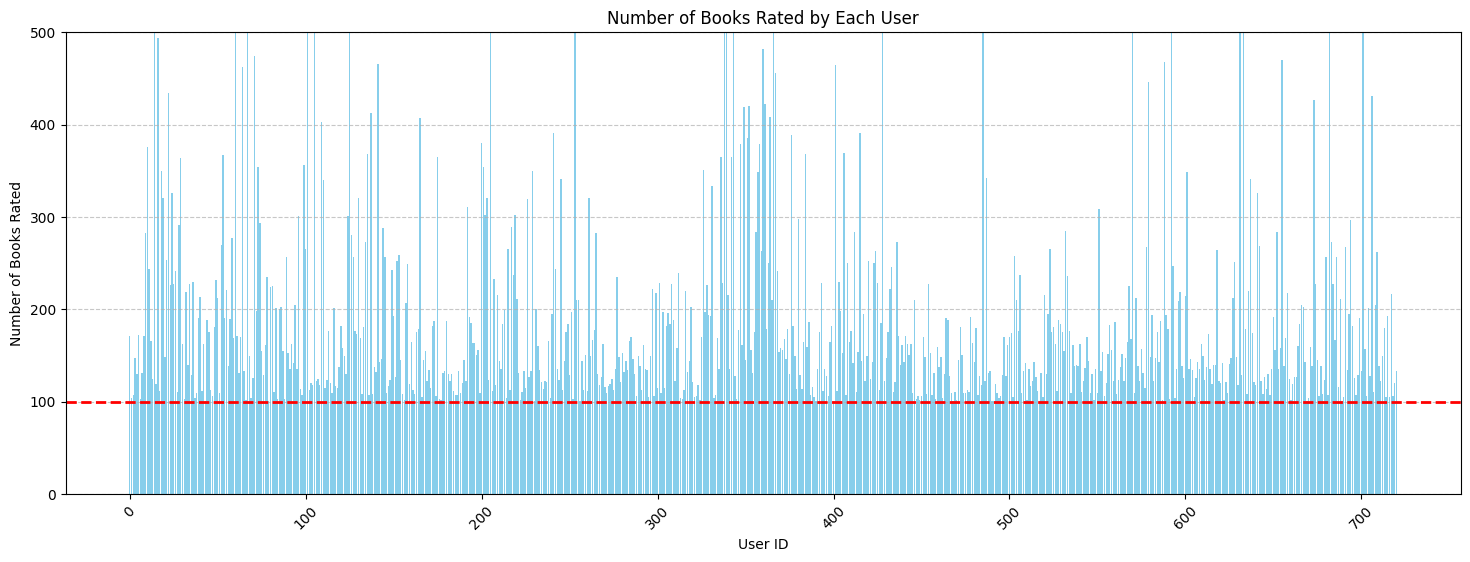

In [53]:
df_great_books = df_book_ratings[df_book_ratings['nb_rate'] > 100]
df_great_books = df_great_books.reset_index(drop=True)
df_great_books['did'] = df_great_books.index

plt.figure(figsize=(18,6))
plt.bar(df_great_books['did'], df_great_books['nb_rate'], color='skyblue')
plt.ylim(0, 500)
plt.axhline(y=100, color='red', linestyle='--', linewidth=2)
plt.xlabel('User ID')
plt.ylabel('Number of Books Rated')
plt.title('Number of Books Rated by Each User')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Filter the rating data

Filter `df_ratings`  into `df_ratings_filtered` to keep only books rated more than 100 times from users who rated more than 200 book 

In [110]:
df_ratings_filtered = df_ratings[
    df_ratings['user'].isin(df_great_users['user']) & 
    df_ratings['isbn'].isin(df_great_books['isbn'])
]


#### KNN

In [114]:
# Sample df_ratings with 'user', 'isbn', and 'rating'
pivot_table = df_ratings_filtered.pivot_table(index='isbn', columns='user', values='rating').fillna(0)

# Convert pivot table to NumPy array
book_matrix = pivot_table.values

# Fit the KNN model (using cosine similarity)
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(book_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

### get_recommends function

In [129]:
def get_recommends(book_name = "", pivot_table = pivot_table, knn = knn):
    # Find the isbn of the book by its name from df_books
    try :
        book_isbn = df_books.loc[df_books['title'] == book_name, 'isbn'].values[0]
        
    except IndexError :
        print(f"The book '{book_name}' not found in the recommendation system.")
        
    # Get the index of the book in the pivot_table 
    book_index = pivot_table.index.get_loc(book_isbn)

    # Find the nearest 5 neighbors using the kneighbors method
    distances, indices = knn.kneighbors([pivot_table.values[book_index]], n_neighbors=6)

    # Exclude the first result as it's the book itself
    nearest_isbns = pivot_table.index[indices[0][1:]]
    nearest_distances = distances[0][1:]

    # Convert ISBNs to book names
    nearest_books = df_books[df_books['isbn'].isin(nearest_isbns)]

    # Switch from Series to list
    nearest_books = nearest_books['title'].to_list()


    # Change nearest_distances from type ndarray to .5f
    nearest_distances = [round(float(x), 2) for x in nearest_distances]
    
    book_recommendations = [list(pair) for pair in zip(nearest_books, nearest_distances)]

    book_recommendations_sorted = sorted(book_recommendations, key=lambda x: x[1], reverse=True)

    return [book_name, book_recommendations_sorted]


book_name = 'The Queen of the Damned (Vampire Chronicles (Paperback))'
get_recommends(book_name)

['The Queen of the Damned (Vampire Chronicles (Paperback))',
 [['Lasher: Lives of the Mayfair Witches (Lives of the Mayfair Witches)',
   0.78],
  ['The Tale of the Body Thief (Vampire Chronicles (Paperback))', 0.74],
  ['Interview with the Vampire', 0.73],
  ['The Witching Hour (Lives of the Mayfair Witches)', 0.53],
  ['The Vampire Lestat (Vampire Chronicles, Book II)', 0.52]]]

## Testing process

In [132]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)

def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]
  for i in range(2): 
    if recommends[1][i][0] not in recommended_books:
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! 🎉🎉🎉🎉🎉")
  else:
    print("You haven't passed yet. Keep trying!")

test_book_recommendation()

["Where the Heart Is (Oprah's Book Club (Paperback))", [['The Surgeon', 0.8], ['The Weight of Water', 0.77], ['The Lovely Bones: A Novel', 0.77], ['I Know This Much Is True', 0.77], ["I'll Be Seeing You", 0.72]]]
You passed the challenge! 🎉🎉🎉🎉🎉
